In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [40]:
X,y=df[["Weight"]],df["Height"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

Text(0, 0.5, 'Height')

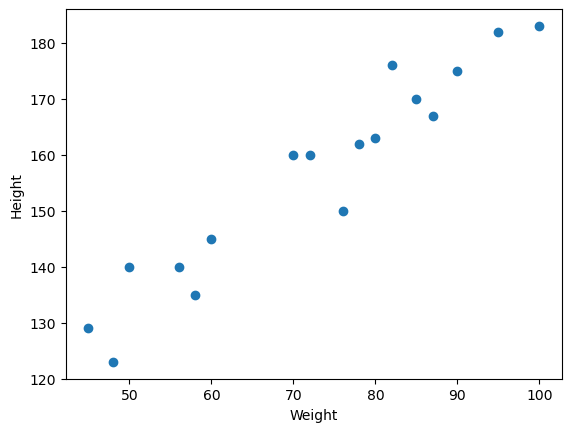

In [41]:
plt.scatter(X_train,y_train)
plt.xlabel("Weight")
plt.ylabel("Height")

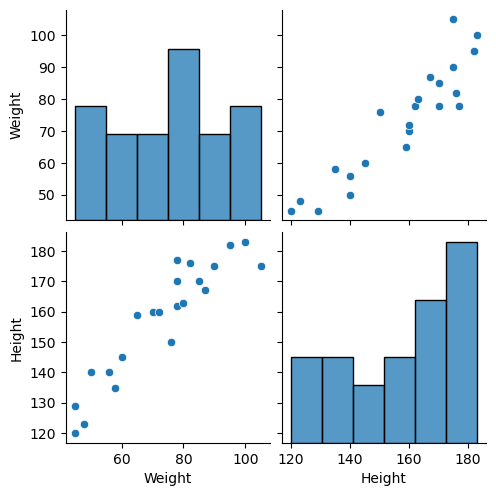

In [42]:
sns.pairplot(df)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [44]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [45]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred=regression.predict(X_test)

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [48]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [49]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

0.7360826717981276


In [50]:
regression.coef_

array([17.2982057])

In [51]:
regression.intercept_

156.47058823529412

In [52]:
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

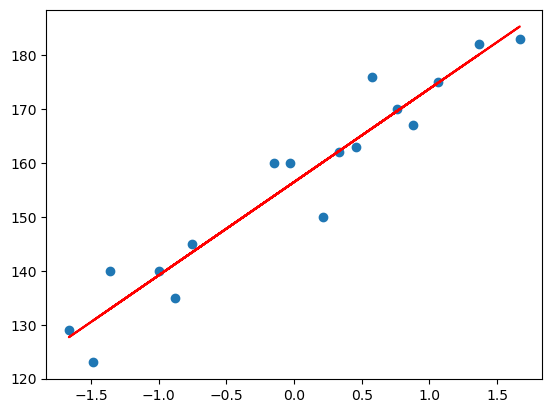

In [53]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'r')

In [54]:
import statsmodels.api as sm

In [55]:
model=sm.OLS(y_train,X_train).fit()

In [56]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [57]:
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [58]:
y_test

15    177
9     170
0     120
8     182
17    159
12    175
Name: Height, dtype: int64

In [59]:
mse=mean_squared_error(y_test,prediction)
mae=mean_absolute_error(y_test,prediction)
print(mae)
print(mse)

158.38823270457166
25197.995591919273


In [60]:
score=r2_score(y_test,prediction)
print(score)

-56.90793752372127


In [61]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 19 Jun 2024   Prob (F-statistic):                       0.664
Time:                        15:52:59   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [62]:
regression.predict(scaler.transform([[72]]))

array([155.97744705])

Text(0.5, 1.0, 'best fit for OLS')

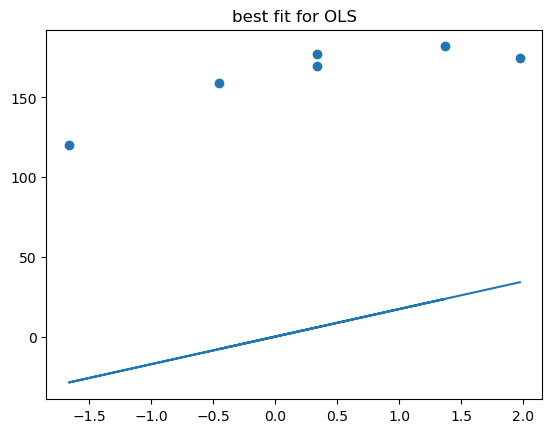

In [65]:
plt.scatter(X_test,y_test)
plt.plot(X_test,prediction)
plt.title("best fit for OLS")